<a href="https://colab.research.google.com/github/youkeykuwa/thesis/blob/main/Thesis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/OxCGRT_raw_USA_v1.csv'
data = pd.read_csv(file_path)

# New York Sate Anaylsis
# Filter for New York State
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Filter for New York State
ny_data = data[data['RegionName'] == 'New York']

# Filter for the date range 2020-2022
ny_data = ny_data[(ny_data['Date'] >= '2020-01-01') & (ny_data['Date'] <= '2022-12-31')]

# Display the first few rows of the filtered DataFrame
ny_data.head()

# Analyzing the 'H7_Vaccination policy' column
vaccination_policy_changes = ny_data[['Date', 'H7_Vaccination policy']].drop_duplicates()

# Display the changes in vaccination policy over time
vaccination_policy_changes.sort_values(by='Date', inplace=True)
vaccination_policy_changes.head(10)  # Displaying the first 10 entries for brevity


<ipython-input-41-94a4ad7906b4>:5: DtypeWarning: Columns (65,67,76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Date,H7_Vaccination policy
39456,2020-01-01,0.0
39457,2020-01-02,0.0
39458,2020-01-03,0.0
39459,2020-01-04,0.0
39460,2020-01-05,0.0
39461,2020-01-06,0.0
39462,2020-01-07,0.0
39463,2020-01-08,0.0
39464,2020-01-09,0.0
39465,2020-01-10,0.0


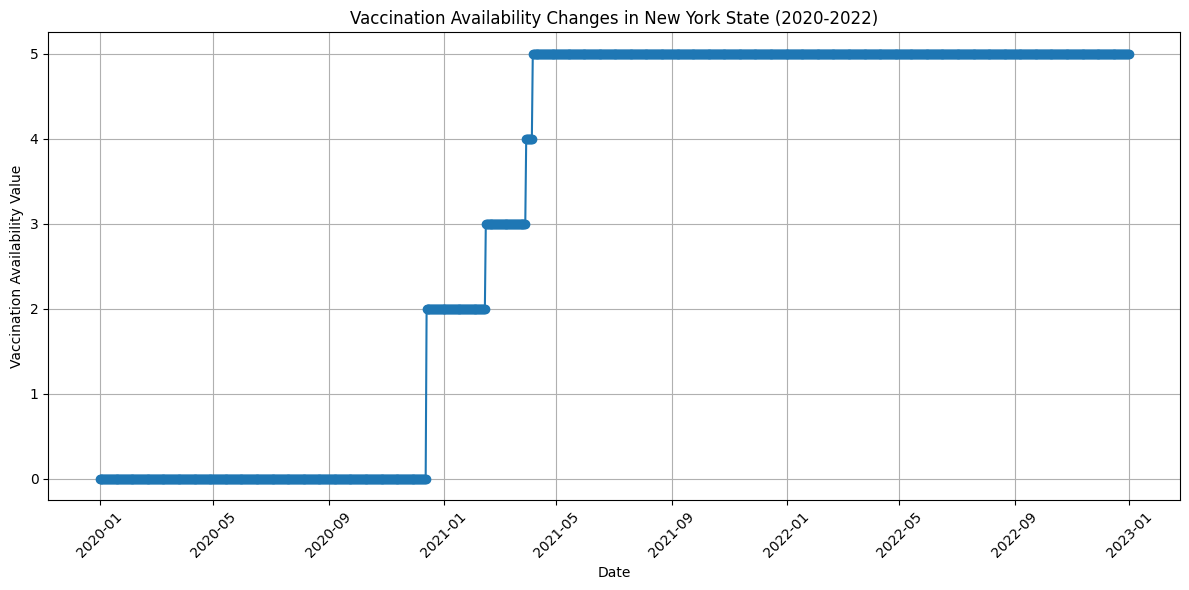

In [ ]:
import matplotlib.pyplot as plt

# Plotting the changes in vaccination policy over time
plt.figure(figsize=(12, 6))
plt.plot(vaccination_policy_changes['Date'], vaccination_policy_changes['H7_Vaccination policy'], marker='o')
plt.title('Vaccination Availability Changes in New York State (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Vaccination Availability Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


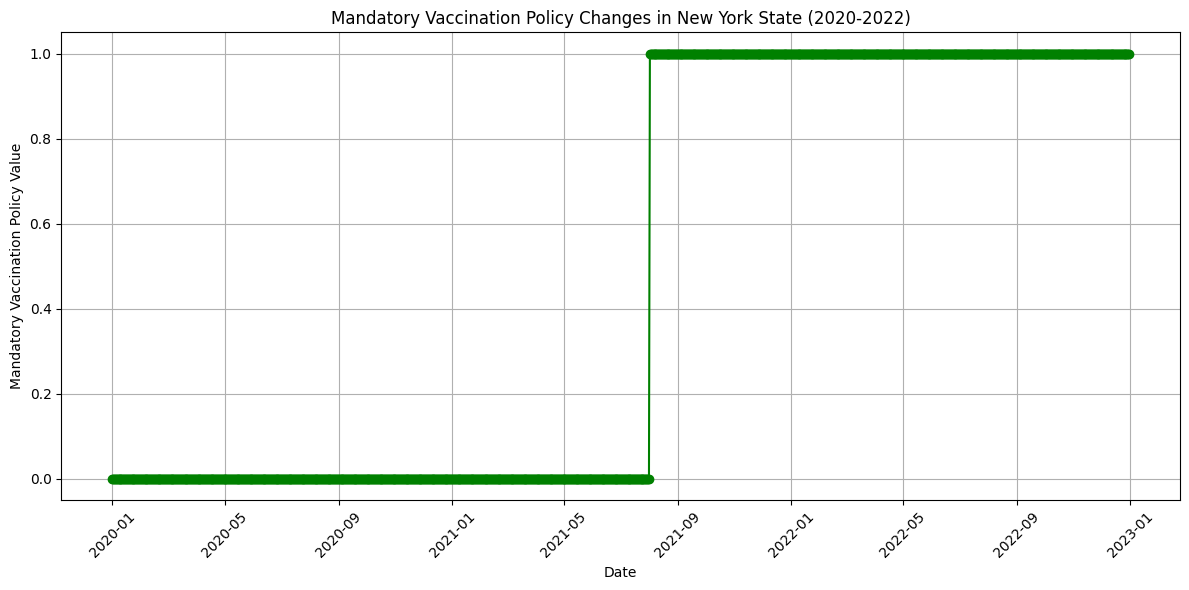

In [ ]:
import matplotlib.pyplot as plt

# Analyzing the 'V4_Mandatory Vaccination (summary)' column
mandatory_vaccination_policy_changes = ny_data[['Date', 'V4_Mandatory Vaccination (summary)']].drop_duplicates()

# Sort the data by date
mandatory_vaccination_policy_changes.sort_values(by='Date', inplace=True)

# Plotting the changes in mandatory vaccination policy over time
plt.figure(figsize=(12, 6))
plt.plot(mandatory_vaccination_policy_changes['Date'], mandatory_vaccination_policy_changes['V4_Mandatory Vaccination (summary)'], marker='o', color='green')
plt.title('Mandatory Vaccination Policy Changes in New York State (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Mandatory Vaccination Policy Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


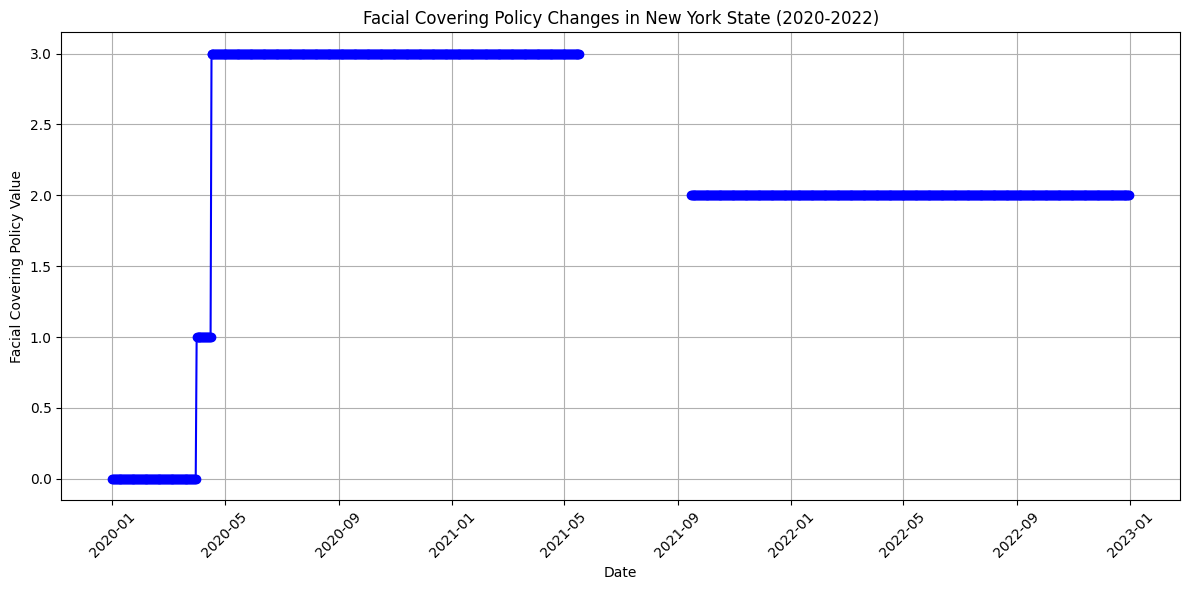

In [ ]:
# Analyzing the 'H6E_Facial Coverings' column
facial_covering_policy_changes = ny_data[['Date', 'H6E_Facial Coverings']].drop_duplicates()

# Display the changes in facial covering policy over time
facial_covering_policy_changes.sort_values(by='Date', inplace=True)

# Plotting the changes in facial covering policy over time
plt.figure(figsize=(12, 6))
plt.plot(facial_covering_policy_changes['Date'], facial_covering_policy_changes['H6E_Facial Coverings'], marker='o', color='blue')
plt.title('Facial Covering Policy Changes in New York State (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Facial Covering Policy Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



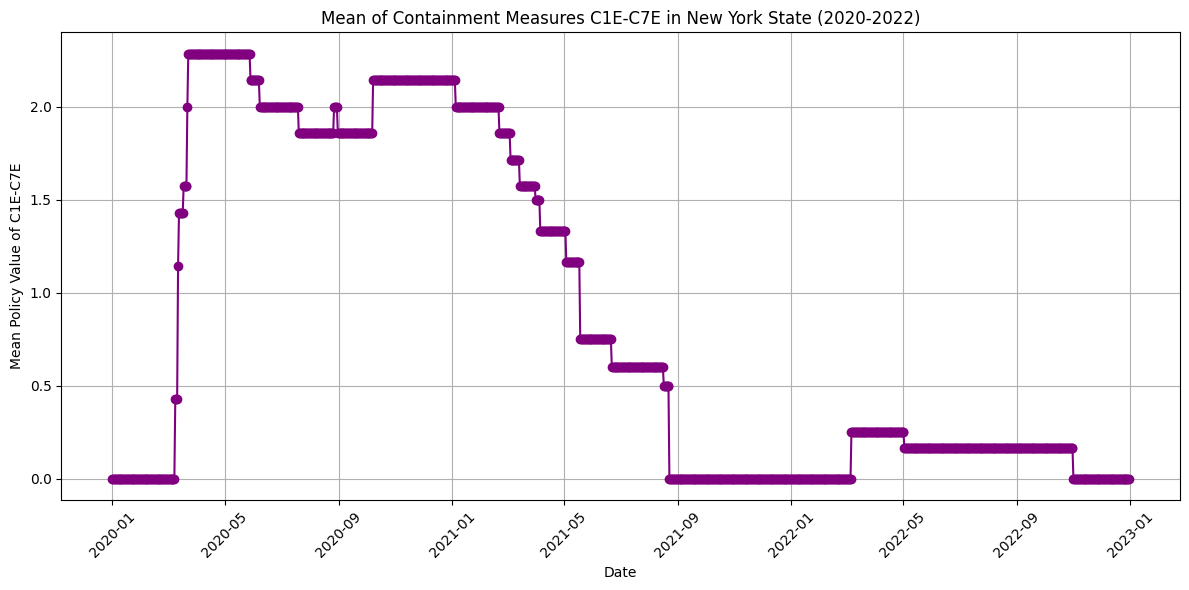

In [ ]:
# Calculating the simple mean of columns C1E to C7E

# Selecting the columns
containment_measures_columns = ['C1E_School closing', 'C2E_Workplace closing', 'C3E_Cancel public events',
                                'C4E_Restrictions on gatherings', 'C5E_Close public transport',
                                'C6E_Stay at home requirements', 'C7E_Restrictions on internal movement']

# Filtering the dataset for these columns and calculating the mean
ny_data['Mean_C1E_C7E'] = ny_data[containment_measures_columns].mean(axis=1)

# Creating a DataFrame for plotting
containment_measures_mean = ny_data[['Date', 'Mean_C1E_C7E']].drop_duplicates()

# Sort the data by date
containment_measures_mean.sort_values(by='Date', inplace=True)

# Plotting the mean of C1E-C7E containment measures over time
plt.figure(figsize=(12, 6))
plt.plot(containment_measures_mean['Date'], containment_measures_mean['Mean_C1E_C7E'], marker='o', color='purple')
plt.title('Mean of Containment Measures C1E-C7E in New York State (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Mean Policy Value of C1E-C7E')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


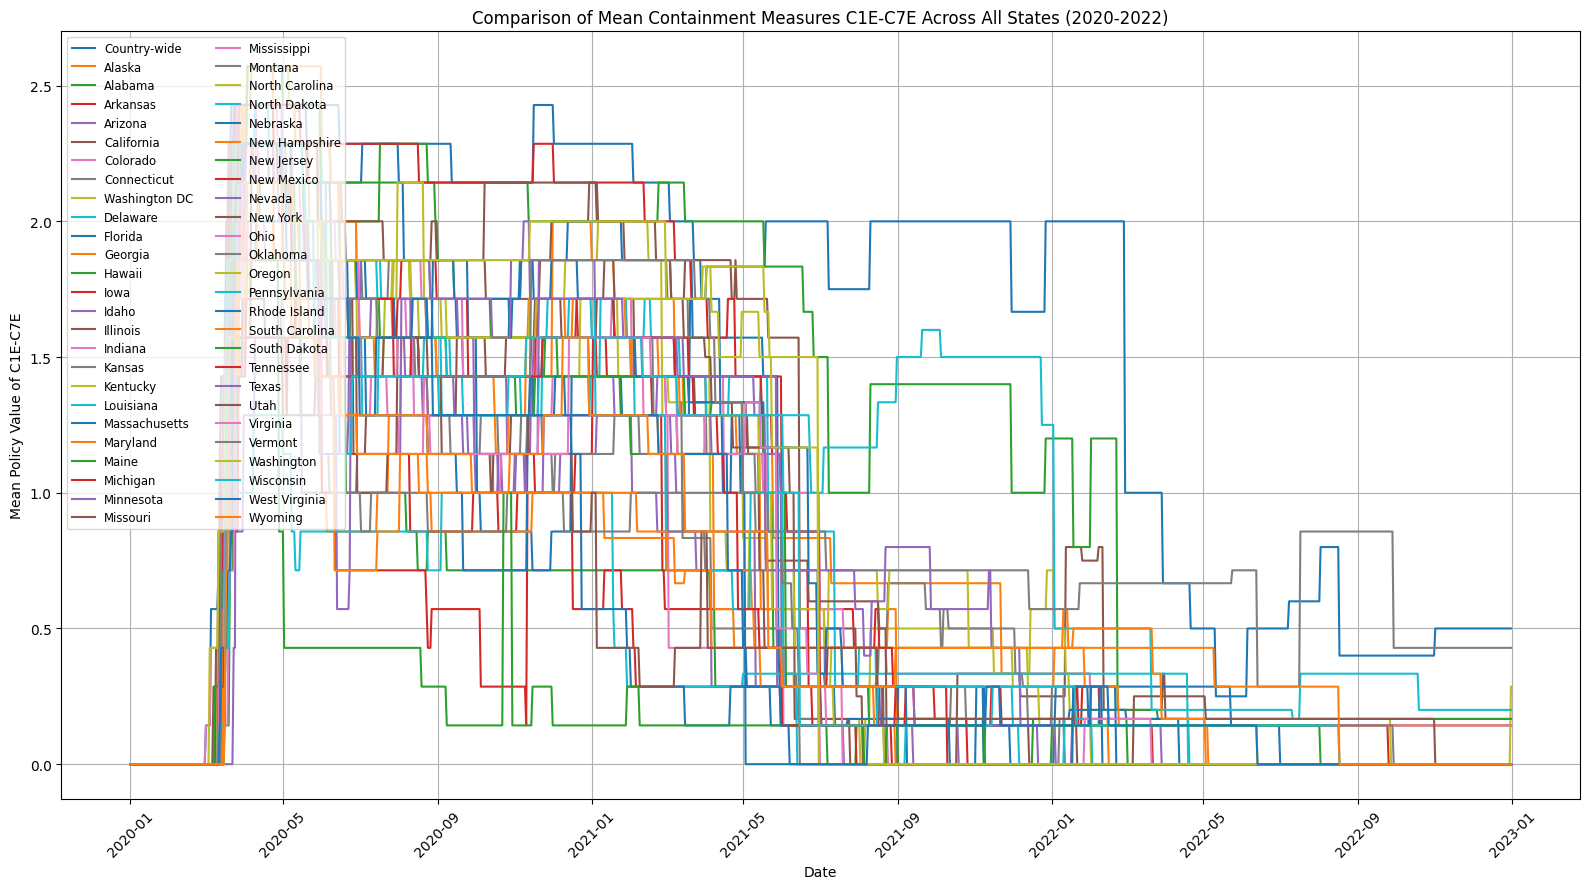

In [ ]:
# Calculating the mean of C1E-C7E for each state in the dataset
all_states_data = data.copy()
all_states_data['Mean_C1E_C7E'] = all_states_data[containment_measures_columns].mean(axis=1)

# Creating a DataFrame for plotting, considering all states
all_states_mean = all_states_data[['Date', 'RegionName', 'Mean_C1E_C7E']].drop_duplicates()

# Getting a list of all unique states in the dataset
unique_states = all_states_mean['RegionName'].unique()

# Plotting the mean of C1E-C7E containment measures over time for each state
plt.figure(figsize=(16, 9))

for state in unique_states:
    if pd.notna(state):  # Filtering out NaN values (if any)
        state_data = all_states_mean[all_states_mean['RegionName'] == state]
        plt.plot(state_data['Date'], state_data['Mean_C1E_C7E'], label=state)

plt.title('Comparison of Mean Containment Measures C1E-C7E Across All States (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Mean Policy Value of C1E-C7E')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', ncol=2, fontsize='small')
plt.tight_layout()

# Show the plot
plt.show()


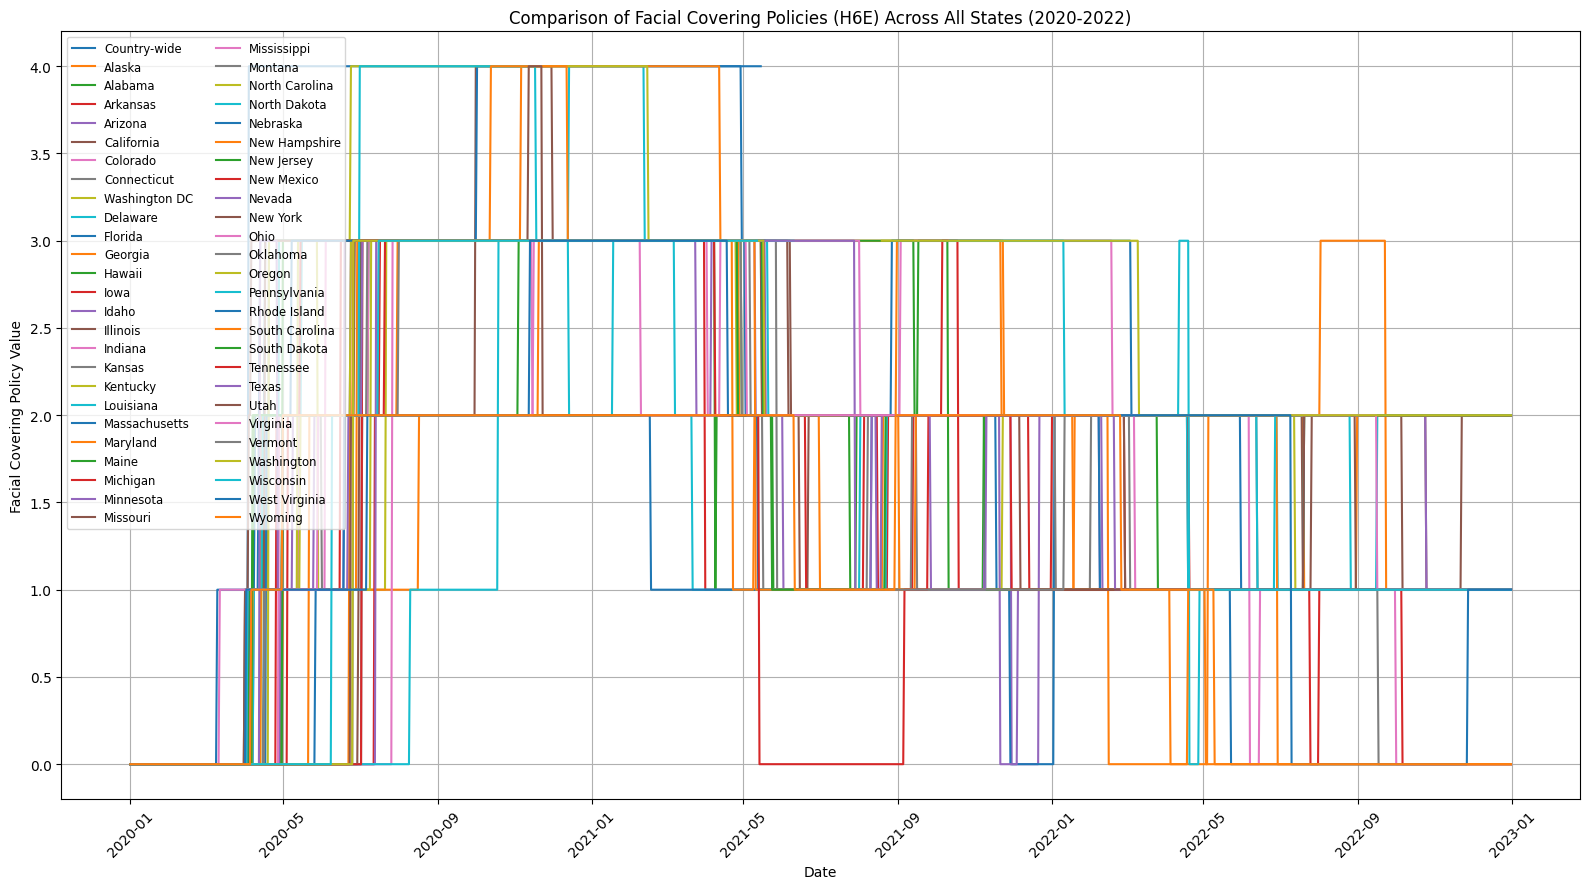

In [ ]:
# Calculating 'H6E_Facial Coverings' for each state in the dataset
all_states_data['H6E_Facial Coverings'] = data['H6E_Facial Coverings']

# Creating a DataFrame for plotting, considering 'H6E_Facial Coverings' for all states
facial_coverings_all_states = all_states_data[['Date', 'RegionName', 'H6E_Facial Coverings']].drop_duplicates()

# Plotting 'H6E_Facial Coverings' for each state over time
plt.figure(figsize=(16, 9))

for state in unique_states:
    if pd.notna(state):  # Filtering out NaN values
        state_data = facial_coverings_all_states[facial_coverings_all_states['RegionName'] == state]
        plt.plot(state_data['Date'], state_data['H6E_Facial Coverings'], label=state)

plt.title('Comparison of Facial Covering Policies (H6E) Across All States (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Facial Covering Policy Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', ncol=2, fontsize='small')
plt.tight_layout()

# Show the plot
plt.show()


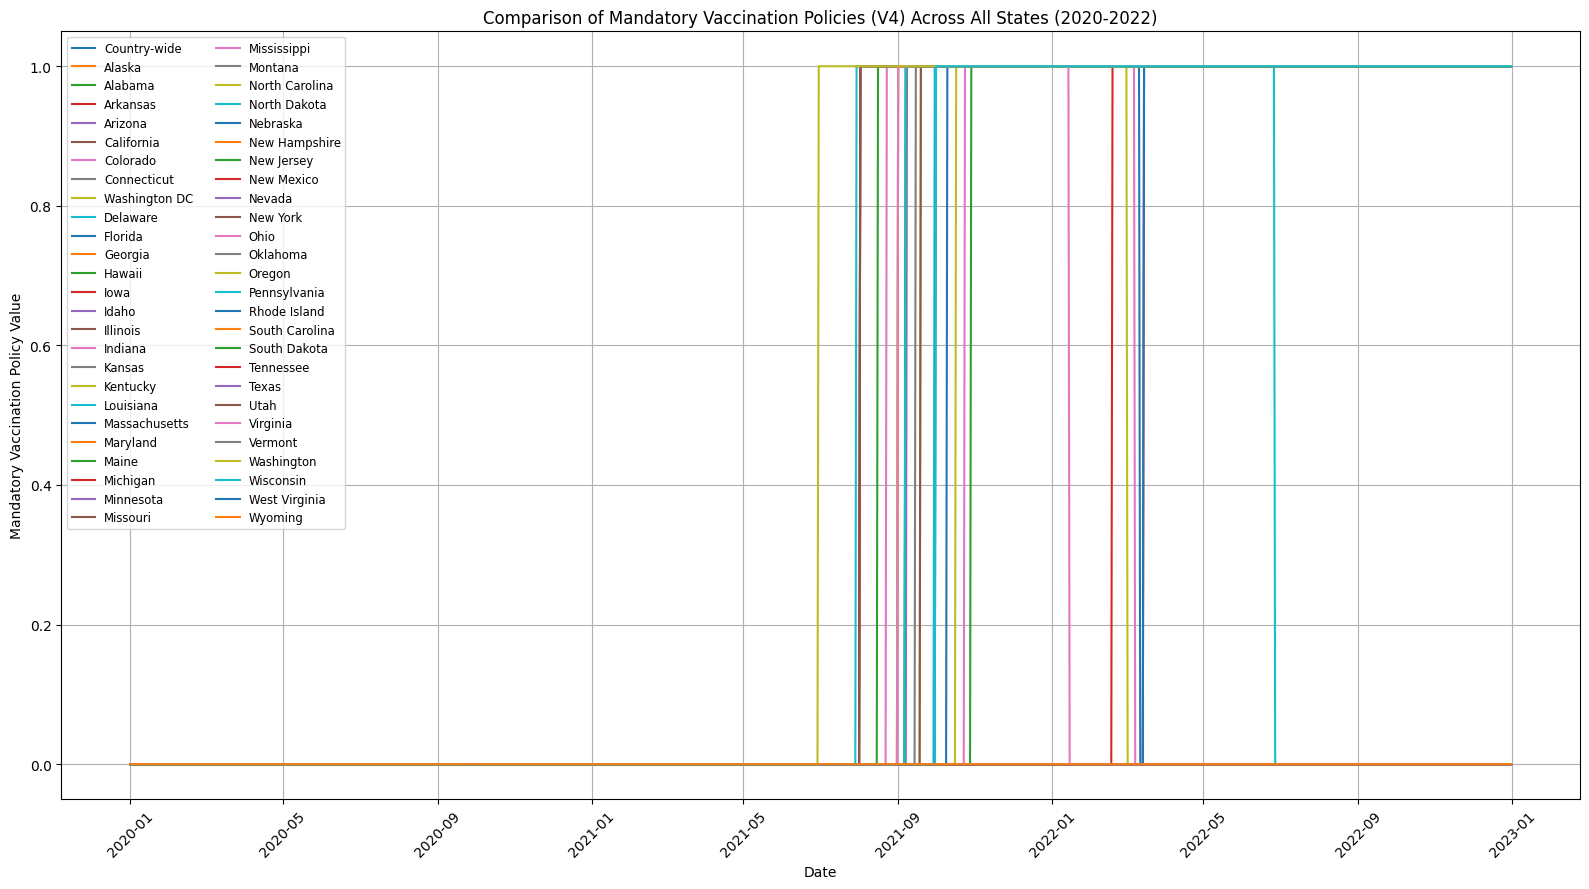

In [ ]:
# Calculating 'V4_Mandatory Vaccination (summary)' for each state in the dataset
all_states_data['V4_Mandatory Vaccination (summary)'] = data['V4_Mandatory Vaccination (summary)']

# Creating a DataFrame for plotting, considering 'V4_Mandatory Vaccination (summary)' for all states
mandatory_vaccination_all_states = all_states_data[['Date', 'RegionName', 'V4_Mandatory Vaccination (summary)']].drop_duplicates()

# Plotting 'V4_Mandatory Vaccination (summary)' for each state over time
plt.figure(figsize=(16, 9))

for state in unique_states:
    if pd.notna(state):  # Filtering out NaN values
        state_data = mandatory_vaccination_all_states[mandatory_vaccination_all_states['RegionName'] == state]
        plt.plot(state_data['Date'], state_data['V4_Mandatory Vaccination (summary)'], label=state)

plt.title('Comparison of Mandatory Vaccination Policies (V4) Across All States (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Mandatory Vaccination Policy Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', ncol=2, fontsize='small')
plt.tight_layout()

# Show the plot
plt.show()


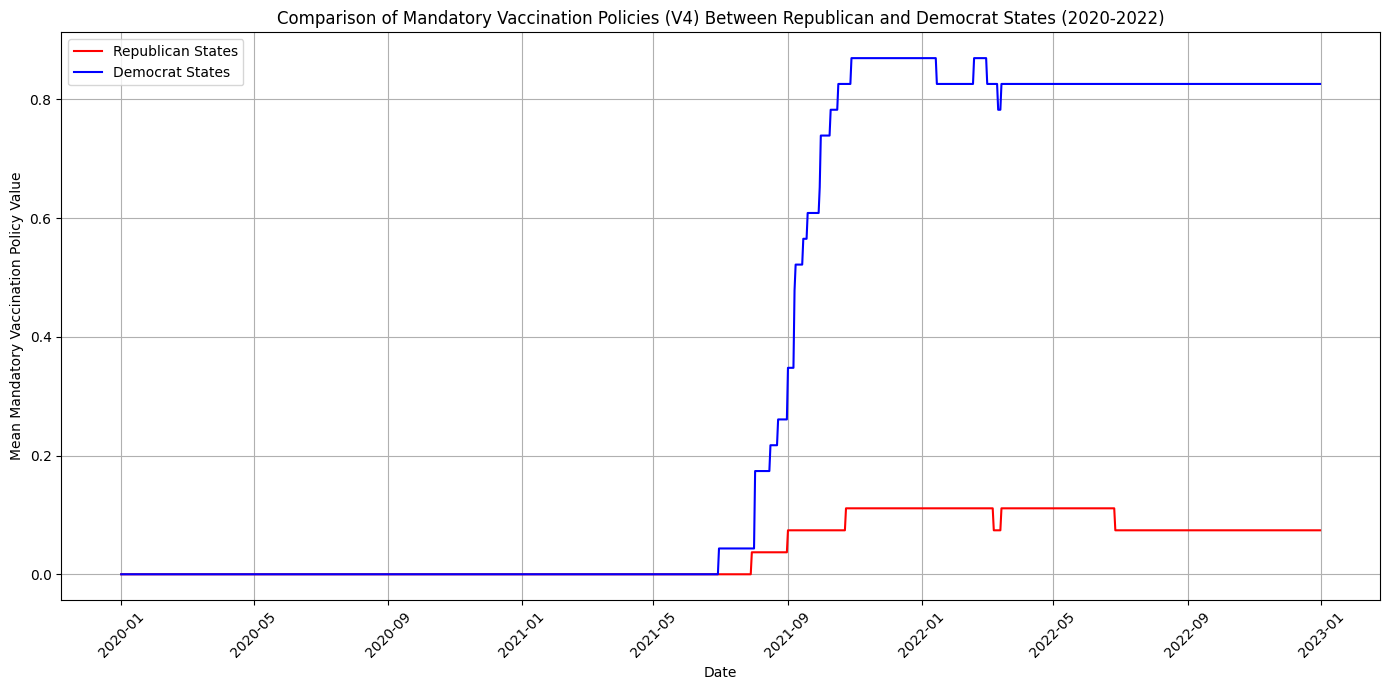

In [ ]:
# Dividing the states into Republican and Democrat

republican_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia',
                     'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
                     'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'North Carolina',
                     'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota',
                     'Tennessee', 'Texas', 'Utah', 'West Virginia', 'Wyoming']

democrat_states = ['California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois',
                   'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Nevada',
                   'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Oregon',
                   'Pennsylvania', 'Rhode Island', 'Vermont', 'Virginia', 'Washington', 'Wisconsin']

# Creating separate DataFrames for Republican and Democrat states
rep_data = mandatory_vaccination_all_states[mandatory_vaccination_all_states['RegionName'].isin(republican_states)]
dem_data = mandatory_vaccination_all_states[mandatory_vaccination_all_states['RegionName'].isin(democrat_states)]

# Grouping by date and taking the mean of V4_Mandatory Vaccination for each group
rep_mean_v4 = rep_data.groupby('Date')['V4_Mandatory Vaccination (summary)'].mean()
dem_mean_v4 = dem_data.groupby('Date')['V4_Mandatory Vaccination (summary)'].mean()

# Plotting the mean of V4_Mandatory Vaccination over time for Republican vs Democrat states
plt.figure(figsize=(14, 7))
plt.plot(rep_mean_v4.index, rep_mean_v4.values, label='Republican States', color='red')
plt.plot(dem_mean_v4.index, dem_mean_v4.values, label='Democrat States', color='blue')

plt.title('Comparison of Mandatory Vaccination Policies (V4) Between Republican and Democrat States (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Mean Mandatory Vaccination Policy Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


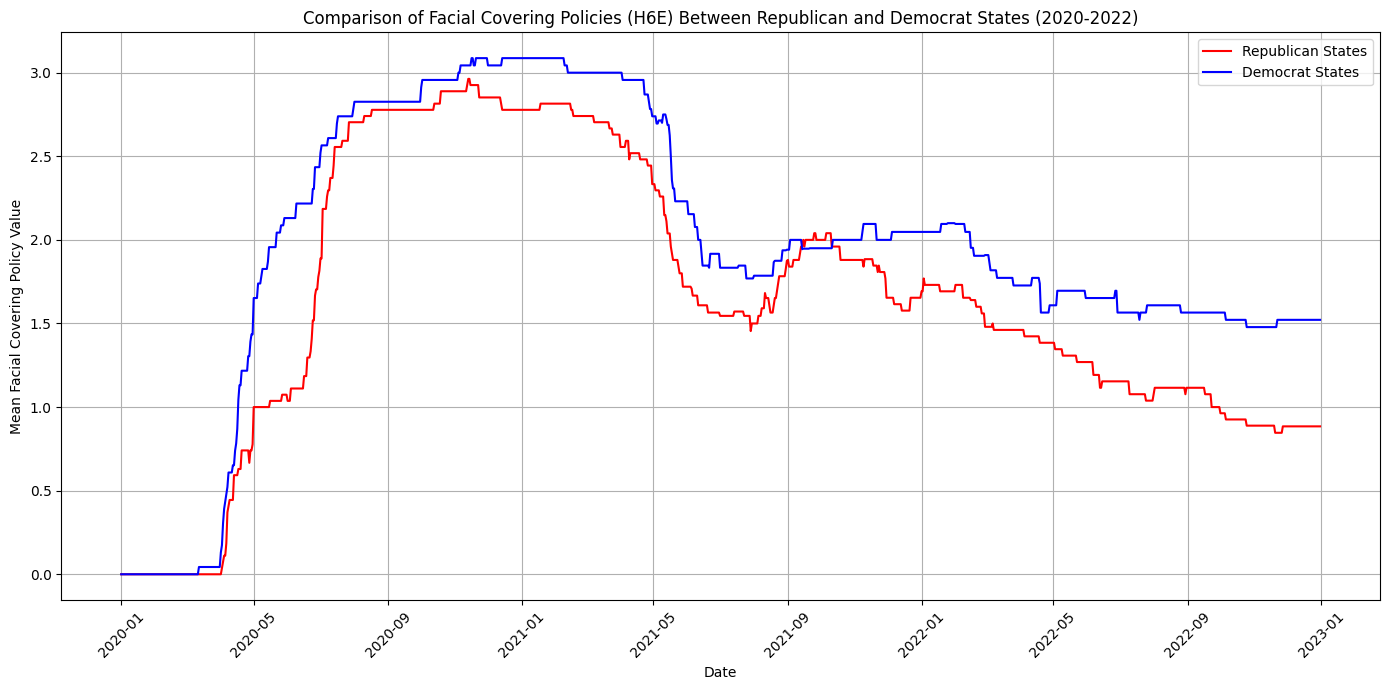

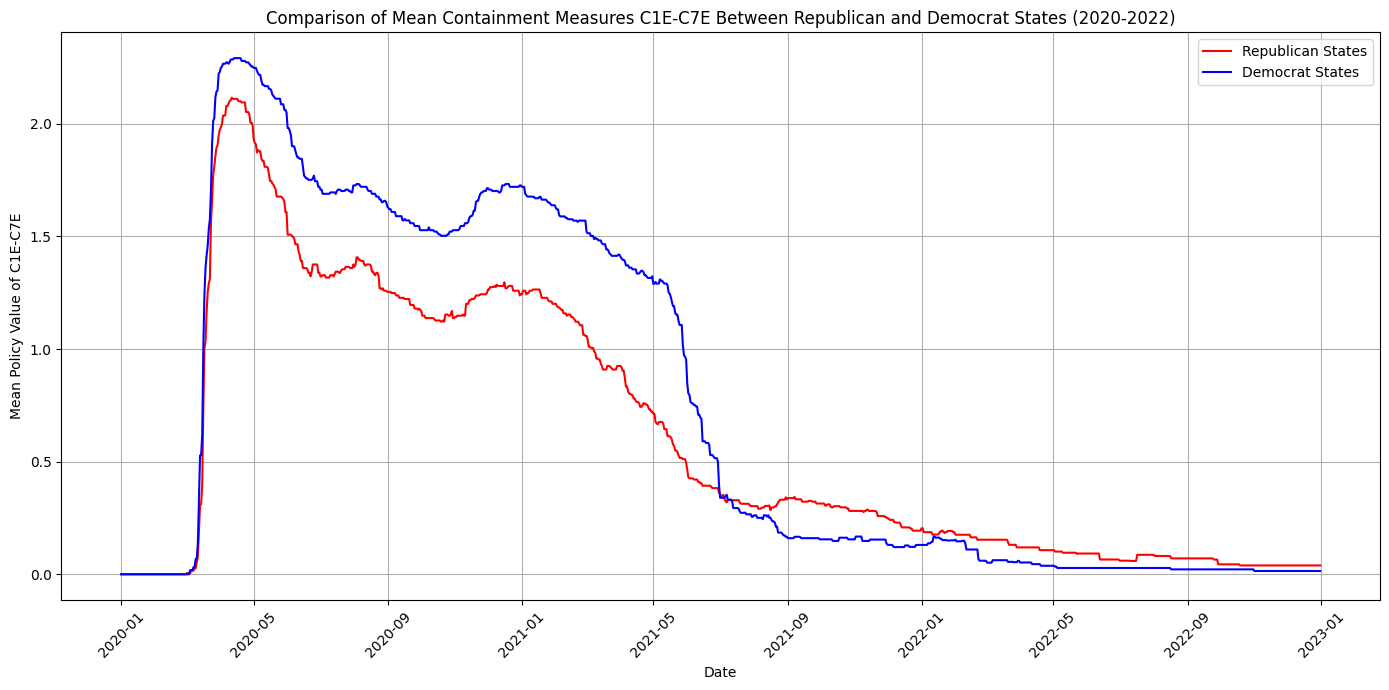

In [ ]:
# Correcting the issue and including 'H6E_Facial Coverings' in the Republican and Democrat state groupings
rep_data_h6e = all_states_data[all_states_data['RegionName'].isin(republican_states)][['Date', 'H6E_Facial Coverings']]
dem_data_h6e = all_states_data[all_states_data['RegionName'].isin(democrat_states)][['Date', 'H6E_Facial Coverings']]

# Grouping by date and taking the mean of H6E_Facial Coverings for each group
rep_mean_h6e = rep_data_h6e.groupby('Date')['H6E_Facial Coverings'].mean()
dem_mean_h6e = dem_data_h6e.groupby('Date')['H6E_Facial Coverings'].mean()

# Plotting the mean of H6E_Facial Coverings over time for Republican vs Democrat states
plt.figure(figsize=(14, 7))
plt.plot(rep_mean_h6e.index, rep_mean_h6e.values, label='Republican States', color='red')
plt.plot(dem_mean_h6e.index, dem_mean_h6e.values, label='Democrat States', color='blue')

plt.title('Comparison of Facial Covering Policies (H6E) Between Republican and Democrat States (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Mean Facial Covering Policy Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot for H6E_Facial Coverings
plt.show()

# the mean of C1E-C7E containment measures
rep_data_c1e_c7e = all_states_data[all_states_data['RegionName'].isin(republican_states)][['Date', 'Mean_C1E_C7E']]
dem_data_c1e_c7e = all_states_data[all_states_data['RegionName'].isin(democrat_states)][['Date', 'Mean_C1E_C7E']]

# Grouping by date and taking the mean of C1E-C7E for each group
rep_mean_c1e_c7e = rep_data_c1e_c7e.groupby('Date')['Mean_C1E_C7E'].mean()
dem_mean_c1e_c7e = dem_data_c1e_c7e.groupby('Date')['Mean_C1E_C7E'].mean()

# Plotting the mean of C1E-C7E containment measures over time for Republican vs Democrat states
plt.figure(figsize=(14, 7))
plt.plot(rep_mean_c1e_c7e.index, rep_mean_c1e_c7e.values, label='Republican States', color='red')
plt.plot(dem_mean_c1e_c7e.index, dem_mean_c1e_c7e.values, label='Democrat States', color='blue')

plt.title('Comparison of Mean Containment Measures C1E-C7E Between Republican and Democrat States (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Mean Policy Value of C1E-C7E')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot for C1E-C7E
plt.show()
